In [26]:
# KNN for k ≥ 1 using sklearn

# Read the data from the file "Advertising.csv"
data_filename = 'Advertising.csv'
df = pd.read_csv(data_filename)

# Set 'TV' as the 'predictor variable'   
x = df[['TV']].values

# Set 'Sales' as the response variable 'y' 
y = df['sales'].values


In [34]:
# Split the dataset in training and testing with 60% training set and 40% testing set with random state = 42
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.6,random_state=42)


In [36]:
# Choose the minimum k value based on the instructions given on the left
k_value_min = 1

# Choose the maximum k value based on the instructions given on the left
k_value_max = 70

# Create a list of integer k values betwwen k_value_min and k_value_max using linspace
k_list = np.linspace(k_value_min, k_value_max, 70)

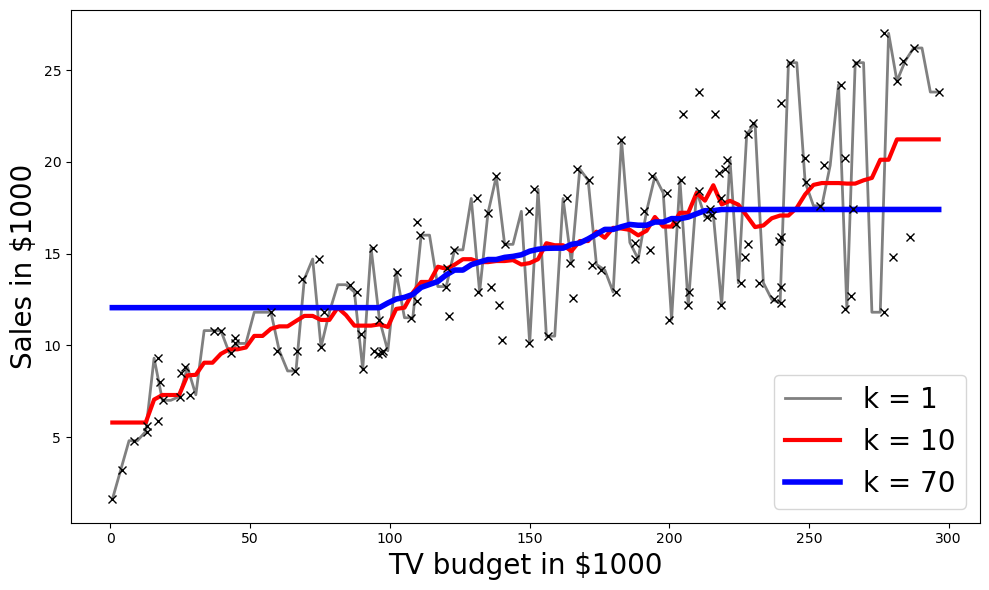

In [38]:
# Set the grid to plot the values
fig, ax = plt.subplots(figsize=(10,6))

# Variable used to alter the linewidth of each plot
j=0

# Loop over all the k values
for k_value in k_list:   
    
    # Creating a kNN Regression model 
    model = KNeighborsRegressor(n_neighbors=int(k_value))
    
    # Fitting the regression model on the training data 
    model.fit(x_train, y_train)
    
    # Use the trained model to predict on the test data 
    y_pred = model.predict(x_test)
    
    # Helper code to plot the data along with the model predictions
    colors = ['grey','r','b']
    if k_value in [1,10,70]:
        xvals = np.linspace(x.min(),x.max(),100).reshape(-1,1)
        ypreds = model.predict(xvals)
        ax.plot(xvals, ypreds,'-',label = f'k = {int(k_value)}',linewidth=j+2,color = colors[j])
        j+=1
        
ax.legend(loc='lower right',fontsize=20)
ax.plot(x_train, y_train,'x',label='train',color='k')
ax.set_xlabel('TV budget in $1000',fontsize=20)
ax.set_ylabel('Sales in $1000',fontsize=20)
plt.tight_layout()